# Binary Classification

## Load Dataset from sklearn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from IPython.display import Image


In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [7]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class'] = cancer.target

df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [8]:
df.describe()
#표를 보면 각 column들의 std랑 mean이 차이가 많이 난다. 
#하지만 먼저 랜덤하게 train, valid, test를 구성하고 나서 standarization 을 실행한다

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## Convert to PyTorch Tensor

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [10]:
data = torch.from_numpy(df.values).float()

data.shape

torch.Size([569, 31])

In [17]:
x = data[:, :-1] # data[행,렬]
y = data[:, -1:]
print(x.shape, y.shape)

torch.Size([569, 30]) torch.Size([569, 1])


In [8]:
# Train / Valid / Test ratio
ratios = [.6, .2, .2]`#6대,2대,2

In [21]:
print(data.size(0))
print(data.size(1))

569
31


In [9]:
train_cnt = int(data.size(0) * ratios[0])
valid_cnt = int(data.size(0) * ratios[1])
test_cnt = data.size(0) - train_cnt - valid_cnt
cnts = [train_cnt, valid_cnt, test_cnt]

print("Train %d / Valid %d / Test %d samples." % (train_cnt, valid_cnt, test_cnt))

Train 341 / Valid 113 / Test 115 samples.


In [10]:
#셔플링해서 인덱스섞은다음에 index_select해서 가져옴

indices = torch.randperm(data.size(0))

x = torch.index_select(x, dim=0, index=indices)
y = torch.index_select(y, dim=0, index=indices)

x = x.split(cnts, dim=0)
y = y.split(cnts, dim=0)

for x_i, y_i in zip(x, y): #zip함수를 사용하면 두개의 인덱스가 동시에 반복되는것을 구현할수있음
    print(x_i.size(), y_i.size())

torch.Size([341, 30]) torch.Size([341, 1])
torch.Size([113, 30]) torch.Size([113, 1])
torch.Size([115, 30]) torch.Size([115, 1])


## Preprocessing - 전처리

In [25]:
print(x[0])
print(x[1])
print(x[2])

tensor([1.7990e+01, 1.0380e+01, 1.2280e+02, 1.0010e+03, 1.1840e-01, 2.7760e-01,
        3.0010e-01, 1.4710e-01, 2.4190e-01, 7.8710e-02, 1.0950e+00, 9.0530e-01,
        8.5890e+00, 1.5340e+02, 6.3990e-03, 4.9040e-02, 5.3730e-02, 1.5870e-02,
        3.0030e-02, 6.1930e-03, 2.5380e+01, 1.7330e+01, 1.8460e+02, 2.0190e+03,
        1.6220e-01, 6.6560e-01, 7.1190e-01, 2.6540e-01, 4.6010e-01, 1.1890e-01])
tensor([2.0570e+01, 1.7770e+01, 1.3290e+02, 1.3260e+03, 8.4740e-02, 7.8640e-02,
        8.6900e-02, 7.0170e-02, 1.8120e-01, 5.6670e-02, 5.4350e-01, 7.3390e-01,
        3.3980e+00, 7.4080e+01, 5.2250e-03, 1.3080e-02, 1.8600e-02, 1.3400e-02,
        1.3890e-02, 3.5320e-03, 2.4990e+01, 2.3410e+01, 1.5880e+02, 1.9560e+03,
        1.2380e-01, 1.8660e-01, 2.4160e-01, 1.8600e-01, 2.7500e-01, 8.9020e-02])
tensor([1.9690e+01, 2.1250e+01, 1.3000e+02, 1.2030e+03, 1.0960e-01, 1.5990e-01,
        1.9740e-01, 1.2790e-01, 2.0690e-01, 5.9990e-02, 7.4560e-01, 7.8690e-01,
        4.5850e+00, 9.4030e+01, 6.1500

In [11]:
scaler = StandardScaler()
scaler.fit(x[0].numpy()) #x[0]은 train set의 입력. 그럼 scaler는 뮤와 시그마를 컬럼별로 가지고 있게됨.

#train set 인 x[0]만 scaler.fit 을 해준다. 정규분포로 만들어준다!!!! - 중요!!

x = [torch.from_numpy(scaler.transform(x[0].numpy())).float(), # 아까 구해놓은 평균과 표준편차를 적용해서 transform 함. x[0] - train
     torch.from_numpy(scaler.transform(x[1].numpy())).float(), #x[1] - valid
     torch.from_numpy(scaler.transform(x[2].numpy())).float()] #x[2] - test

df = pd.DataFrame(x[0].numpy(), columns=cancer.feature_names)
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
336,2.109400,-0.982811,2.074373,2.141978,0.185909,0.834008,1.251482,1.990152,0.556192,-0.173216,...,1.375889,-0.629586,1.369703,1.215443,-0.684062,0.122503,0.548355,1.215406,-0.293150,0.080699
337,0.301591,-0.605077,0.296273,0.197547,-0.622822,-0.197263,-0.192340,-0.226158,-0.799453,-0.451247,...,0.330800,-0.888033,0.324745,0.218299,0.660655,0.418800,0.228829,0.124483,0.779932,0.641780
338,-1.547870,-0.808289,-1.499389,-1.213282,1.248526,-0.454432,-0.611624,-0.789981,-0.602723,1.873202,...,-1.398695,-0.988181,-1.291901,-1.070585,1.708544,-0.164742,-0.170464,-0.184153,0.013892,0.866421
339,-1.253992,-0.846540,-1.262700,-1.041903,-0.508002,-1.105605,-0.983191,-0.925247,0.942498,0.008845,...,-1.160364,-0.784654,-1.182241,-0.941166,0.552717,-1.025874,-1.111026,-1.000206,-0.119264,-0.175809
340,-0.265338,0.317742,-0.319287,-0.319205,-1.721811,-0.996952,-0.897690,-0.964754,-0.373802,-0.589556,...,-0.363802,0.439739,-0.355996,-0.405396,-1.016868,-0.598023,-0.943469,-1.147496,-0.360512,-0.565535


## Build Model & Optimizer

In [12]:
model = nn.Sequential(
    nn.Linear(x[0].size(-1), 25),
    nn.LeakyReLU(), #LeakyReLu = 비선형 활성화 함수
    nn.Linear(25, 20),
    nn.LeakyReLU(),
    nn.Linear(20, 15),
    nn.LeakyReLU(),
    nn.Linear(15, 10),
    nn.LeakyReLU(),
    nn.Linear(10, 5),
    nn.LeakyReLU(),
    nn.Linear(5, y[0].size(-1)),
    nn.Sigmoid(), #binary classification할때는 sigmoid를 써줘야한다
)

model

Sequential(
  (0): Linear(in_features=30, out_features=25, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=25, out_features=20, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=20, out_features=15, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=15, out_features=10, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=10, out_features=5, bias=True)
  (9): LeakyReLU(negative_slope=0.01)
  (10): Linear(in_features=5, out_features=1, bias=True)
  (11): Sigmoid()
)

In [13]:
optimizer = optim.Adam(model.parameters())

## Train

In [14]:
n_epochs = 10000
batch_size = 32
print_interval = 100
early_stop = 1000

In [15]:
from copy import deepcopy

lowest_loss = np.inf
best_model = None

lowest_epoch = np.inf

In [16]:
train_history, valid_history = [], []

for i in range(n_epochs): #epoch에 대한 for문. 셔플링해준다
    indices = torch.randperm(x[0].size(0))
    x_ = torch.index_select(x[0], dim=0, index=indices)
    y_ = torch.index_select(y[0], dim=0, index=indices)
    
    x_ = x_.split(batch_size, dim=0) #batch사이즈로 균등하게 split
    y_ = y_.split(batch_size, dim=0)
    
    train_loss, valid_loss = 0, 0
    y_hat = []
    
    for x_i, y_i in zip(x_, y_): #mini-batch에 대한 for문. 위에서 만든 mini-batch로 손실값구한다. 
        y_hat_i = model(x_i)
        loss = F.binary_cross_entropy(y_hat_i, y_i)

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()        
        train_loss += float(loss) # This is very important to prevent memory leak.

    train_loss = train_loss / len(x_)
        
    with torch.no_grad():
        x_ = x[1].split(batch_size, dim=0)
        y_ = y[1].split(batch_size, dim=0)
        
        valid_loss = 0
        
        for x_i, y_i in zip(x_, y_):
            y_hat_i = model(x_i)
            loss = F.binary_cross_entropy(y_hat_i, y_i) #BCELoss
            
            valid_loss += float(loss)
            
            y_hat += [y_hat_i]
            
    valid_loss = valid_loss / len(x_)
    
    train_history += [train_loss]
    valid_history += [valid_loss]
        
    if (i + 1) % print_interval == 0:
        print('Epoch %d: train loss=%.4e  valid_loss=%.4e  lowest_loss=%.4e' % (
            i + 1,
            train_loss,
            valid_loss,
            lowest_loss,
        ))
        
    if valid_loss <= lowest_loss:
        lowest_loss = valid_loss
        lowest_epoch = i
        
        best_model = deepcopy(model.state_dict())
    else:
        if early_stop > 0 and lowest_epoch + early_stop < i + 1:
            print("There is no improvement during last %d epochs." % early_stop)
            break

print("The best validation loss from epoch %d: %.4e" % (lowest_epoch + 1, lowest_loss))
model.load_state_dict(best_model)

Epoch 100: train loss=5.6986e-03  valid_loss=2.1232e-01  lowest_loss=8.8456e-02
Epoch 200: train loss=1.7982e-05  valid_loss=3.7934e-01  lowest_loss=8.8456e-02
Epoch 300: train loss=4.0965e-06  valid_loss=4.2597e-01  lowest_loss=8.8456e-02
Epoch 400: train loss=1.6596e-06  valid_loss=1.1125e+00  lowest_loss=8.8456e-02
Epoch 500: train loss=7.0210e-07  valid_loss=1.1312e+00  lowest_loss=8.8456e-02
Epoch 600: train loss=3.9337e-07  valid_loss=1.1483e+00  lowest_loss=8.8456e-02
Epoch 700: train loss=1.7483e-07  valid_loss=1.1647e+00  lowest_loss=8.8456e-02
Epoch 800: train loss=9.1729e-08  valid_loss=1.1804e+00  lowest_loss=8.8456e-02
Epoch 900: train loss=4.5905e-08  valid_loss=1.1962e+00  lowest_loss=8.8456e-02
Epoch 1000: train loss=2.3287e-08  valid_loss=1.2109e+00  lowest_loss=8.8456e-02
There is no improvement during last 1000 epochs.
The best validation loss from epoch 12: 8.8456e-02


<All keys matched successfully>

## Loss History

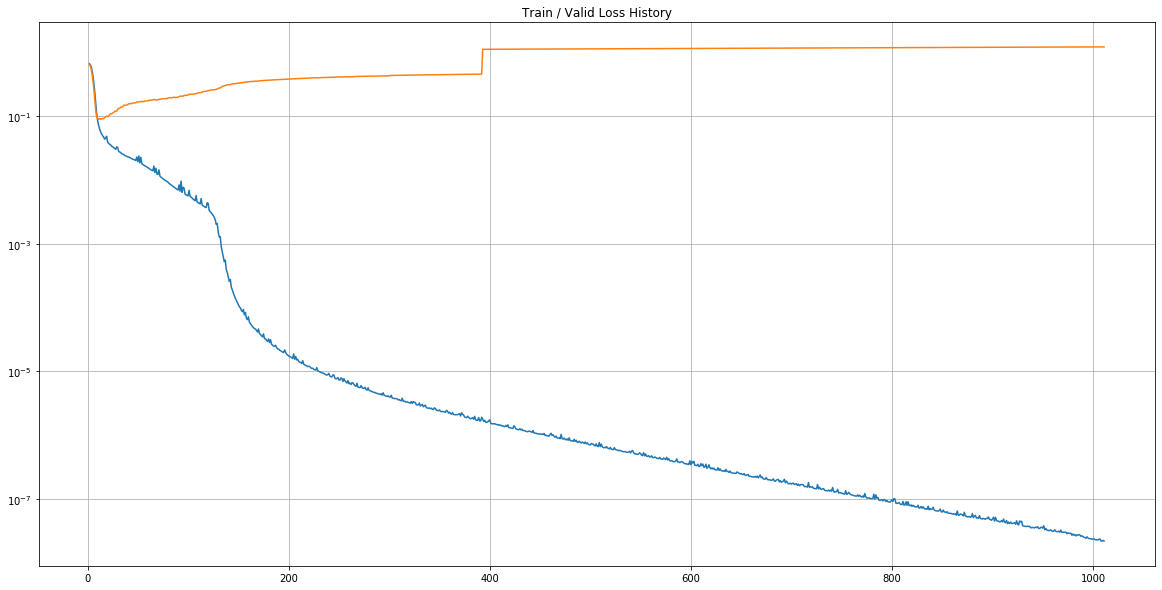

In [17]:
plot_from = 2

plt.figure(figsize=(20, 10))
plt.grid(True)
plt.title("Train / Valid Loss History")
plt.plot(
    range(plot_from, len(train_history)), train_history[plot_from:],
    range(plot_from, len(valid_history)), valid_history[plot_from:],
)
plt.yscale('log')
plt.show()

## Let's see the result!

In [18]:
test_loss = 0
y_hat = []

with torch.no_grad(): #test set을 미니배치
    x_ = x[2].split(batch_size, dim=0)
    y_ = y[2].split(batch_size, dim=0)

    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = F.binary_cross_entropy(y_hat_i, y_i)

        test_loss += loss # Gradient is already detached.

        y_hat += [y_hat_i]

test_loss = test_loss / len(x_)
y_hat = torch.cat(y_hat, dim=0)

print("Test loss: %.4e" % test_loss)

Test loss: 7.3890e-02


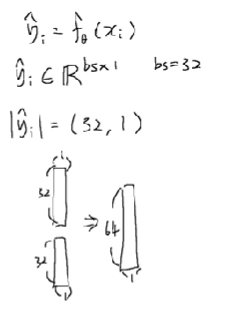

In [4]:
Image("C:\\Users\\ryusu\\OneDrive\\바탕 화면\\100.png")

이번 실습은 일반적인 회귀regression가 아닌 분류 실습이기 때문에, 정확도accruracy도 계산할 수 있습니다. 모델의 예측 값이 0.5보다 클 경우에는 1로 예측한 것으로 가정하고, 작거나 같은 경우에는 0으로 예측한 것이라고 가정합니다. 그렇게 가정했을 때, 실제 정답과 똑같은 갯수를 구하고 전체 갯수로 나누면 정확도를 구할 수 있습니다.

In [19]:
#Test Accuaracy 구하기
correct_cnt = (y[2] == (y_hat > .5)).sum() #Y_hat중에서 0.5넘는수(즉 1인수)와 y값과 같으면 결과값이 True. 그걸 sum하면 1인 개수가 몇개인지 알수잇지
total_cnt = float(y[2].size(0))

print('Test Accuracy: %.4f' % (correct_cnt / total_cnt))

Test Accuracy: 0.9913


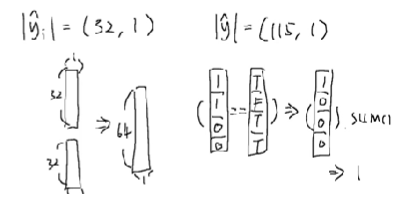

In [2]:
Image("C:\\Users\\ryusu\\OneDrive\\바탕 화면\\2.png")

계산 결과 테스트 데이터셋에 대해서 무려 98%의 높은 정확도를 보이는 것으로 나타났습니다.

그럼 예측 값의 분포도 확인해보도록 하겠습니다. 각 클래스별로 다른 색깔로 칠해 히스토그램histogram으로 나타냈을 떄, 각 클래스의 분포가 서로 겹치지 않을수록 좋은 예측이라고 볼 수 있습니다.

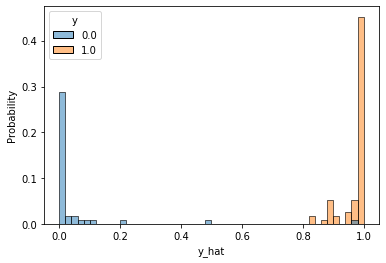

In [20]:
df = pd.DataFrame(torch.cat([y[2], y_hat], dim=1).detach().numpy(),
                  columns=["y", "y_hat"])

sns.histplot(df, x='y_hat', hue='y', bins=50, stat='probability')
plt.show()

그림을 확인해보면 극히 일부를 제외하고 대부분 왼쪽과 오른쪽에 잘 나뉘어져 있는 것을 확인할 수 있습니다.

이번에는 AUROC를 구해보도록 하겠습니다. AUROC는 sklearn을 활용해서 쉽게 계산할 수 있습니다.

In [21]:
from sklearn.metrics import roc_auc_score

roc_auc_score(df.values[:, 0], df.values[:, 1])

0.9951550387596899

정답 값과 예측 실수 값을 함께 넣어주면 자동으로 계산해주는데요, 앞서 그림에서 보았듯이 두 클래스의 분포가 확연하게 나뉠 수 있는 상황이기 때문에 매우 높은 값을 보여줍니다.